In [1]:
from custom_functions import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [2]:
####### Expanded Dimention

def userf1(t, x_arr, p):
    '''2D ODE system for the AMOC
    Input
    t  : fl
    oat
        time value
    x  : array (2, N)
        state space values
    p  : array (2,)
        parameter values
    
    
    Returns
    xout: array, shape (2, N)
           Array containing derivative at x
           2nd dimension denotes derivatives for different points
    '''
    
    if x_arr.ndim == 1:
        x_arr = np.expand_dims(x_arr, axis=1)
    
    n = x_arr.shape
    xout = np.empty(n)
    xout[:] = np.nan 

    b = p[0,]
    g = p[1,]
    
    
    xout[0,:] = x_arr[0, :] - (x_arr[0, :]**2)*np.exp(-b*x_arr[0, :]*x_arr[1, :])
    xout[1,:] = x_arr[1, :] - (x_arr[1, :]**2)*np.exp(-g*x_arr[0, :])
    return xout

def userdf(x):
    h = 1e-06
    J = MyJacobian(userf, x, h)
    if J.ndim > 2:
        J = J.squeeze(axis=2)
    return J

# Finding Equalibrium Points

In [3]:
####### Nonexpanded Dimention

def f1(x_arr, b, g):
    #x_arr is an array where x_arr[0] = x and x_arr[1] = z

    dxdt = x_arr[0] - (x_arr[0]**2)*np.exp(-b*x_arr[0]*x_arr[1])
    dzdt = x_arr[1] - (x_arr[1]**2)*np.exp(-g*x_arr[0])

    return np.array([dxdt, dzdt])



def df_for_f1(x):
    h = 1e-06
    J = MyJacobian(function_being_used, x, h)
    J = np.squeeze(J, axis = 2)
    return J
    
def grid_of_coords(max_x_val, increment):
    x=np.linspace(-max_x_val, max_x_val, int(2*max_x_val/increment + 1))
    y=np.linspace(-max_x_val, max_x_val, int(2*max_x_val/increment + 1))

    xx,yy=np.meshgrid(x,y)
    coords=np.array((xx.ravel(), yy.ravel())).T
    return coords

def bin_repeats(points, threshold):

    # Function to calculate the distance between two points
    def distance(point1, point2):
        return np.sqrt(np.sum((point1 - point2) ** 2))

    # Create a mask for points to keep
    keep_mask = np.ones(len(points), dtype=bool)

    # Iterate through the points and filter based on the threshold
    for i in range(len(points)):
        if keep_mask[i]:
            for j in range(i + 1, len(points)):
                if distance(points[i], points[j]) < threshold:
                    keep_mask[j] = False

    # Use the mask to filter the points and create a 2D NumPy array
    return points[keep_mask] 

### Create Grid of points and then find where they converge

In [45]:

#comment out to save ti
def function_being_used(x0):
    b = 0.375
    g = -0.0125
    return f1(x0, b, g)


x0 = np.array([0, 1.])
tol = 1e-8
maxit = 100

#coords = grid_of_coords(15, 0.1) #Note that this did not give anything different than 15, 0.25
coords = grid_of_coords(15, 0.25)
eqlib_list = np.empty(shape=[0, 2])

for i in coords:
    x , converged , jacobian = MySolve(function_being_used, i, df_for_f1, tol, maxit)
    
    if converged:
        x = np.squeeze(x, axis = 1)
        eqlib_list = np.append(eqlib_list, np.array([x]), axis=0)

print(bin_repeats(eqlib_list, 1e-5))
equlib_list = bin_repeats(eqlib_list, 1e-5)



matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular


C:\Users\aaron\AppData\Local\Temp\ipykernel_34876\2395956410.py:6: RuntimeWarning: overflow encountered in exp
  dxdt = x_arr[0] - (x_arr[0]**2)*np.exp(-b*x_arr[0]*x_arr[1])
c:\Users\aaron\OneDrive\Documents\AAUni\Dynamical systems and chaos\Case Study\custom_functions.py:55: RuntimeWarning: invalid value encountered in subtract
  dfi = (f(xi1) - f(xi2)) / (2 * h)
c:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\linalg\linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular


C:\Users\aaron\AppData\Local\Temp\ipykernel_34876\2395956410.py:7: RuntimeWarning: overflow encountered in exp
  dzdt = x_arr[1] - (x_arr[1]**2)*np.exp(-g*x_arr[0])


matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is si

In [44]:
J = df_for_f1(equlib_list[3])
eig_val1 = linalg.eig(J)[0]
J = df_for_f1(equlib_list[4])
eig_val1 = linalg.eig(J)[0]
print('For Point:',equlib_list[3])
print('Eigen val:', eig_val1)
print('For Point:',equlib_list[4])
print('Eigen val:', eig_val2)

For Point: [3.43557279 0.9579644 ]
Eigen val: [-0.16832239+0.j -0.96929698+0.j]
For Point: [2.36879323 0.97082416]
Eigen val: [ 0.18963068+0.j -0.95544702+0.j]


In [40]:
#Function for quiver

def function_for_quiver(x_arr, t):
    #x_arr is an array where x_arr[0] = x and x_arr[1] = z
    b = 0.375
    g = -0.0125
    dxdt = x_arr[0] - (x_arr[0]**2)*np.exp(-b*x_arr[0]*x_arr[1])
    dzdt = x_arr[1] - (x_arr[1]**2)*np.exp(-g*x_arr[0])

    return np.array([dxdt, dzdt])


#Create a grid of x and y values
x = np.linspace(-3, 3, 40) + 1.5
y = np.linspace(-3, 3, 40) + 1.5
X, Y = np.meshgrid(x, y)

# Initialize arrays to store the direction vectors
U = np.zeros_like(X)
V = np.zeros_like(Y)

# Compute the direction vectors at each grid point
for i in range(len(x)):
    for j in range(len(y)):
        initial_conditions = [X[i, j], Y[i, j]]
        t = np.linspace(0, 1, 10)  # Time points for integration
        result = odeint(function_for_quiver, initial_conditions, t)
        dx = result[-1, 0] - X[i, j]
        dy = result[-1, 1] - Y[i, j]
        magnitude = np.sqrt(dx**2 + dy**2)
        if magnitude != 0:
            U[i, j] = dx / (2*magnitude)
            V[i, j] = dy / (2*magnitude)

C:\Users\aaron\AppData\Local\Temp\ipykernel_34876\1140608568.py:7: RuntimeWarning: overflow encountered in exp
  dxdt = x_arr[0] - (x_arr[0]**2)*np.exp(-b*x_arr[0]*x_arr[1])
C:\Users\aaron\AppData\Local\Temp\ipykernel_34876\1140608568.py:8: RuntimeWarning: overflow encountered in exp
  dzdt = x_arr[1] - (x_arr[1]**2)*np.exp(-g*x_arr[0])


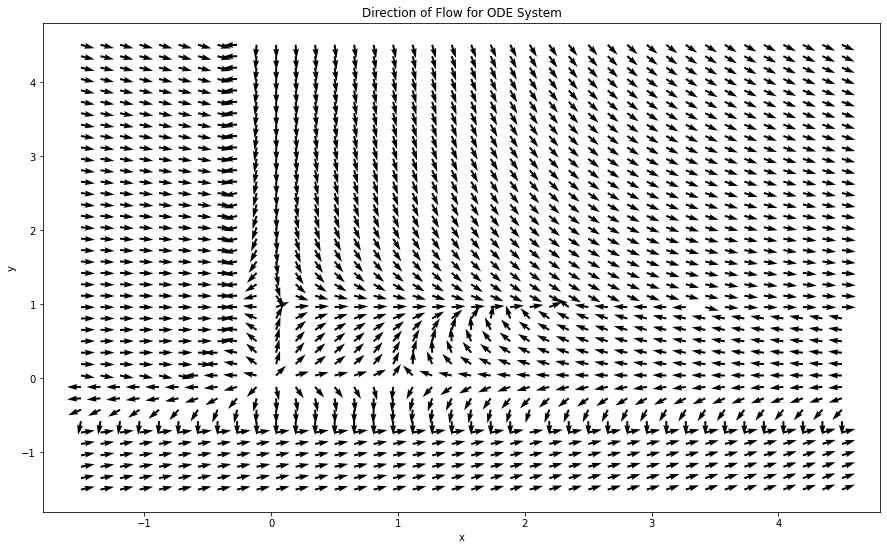

In [42]:
plt.figure(figsize=(15,9))
plt.quiver(X, Y, U, V, scale=30)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Direction of Flow for ODE System')
plt.show()